<a href="https://colab.research.google.com/github/Syauqi366/praktikum-machine-learning-/blob/main/praktikum5mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum5"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
)


In [10]:
df = pd.read_csv(path+f"/data/Iris.csv")


In [13]:
print(df.head(), "\n")

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 



In [14]:
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 



In [15]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

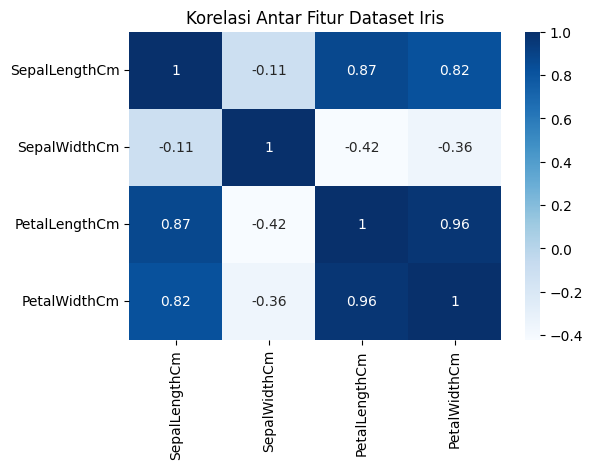

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Korelasi Antar Fitur Dataset Iris")
plt.show()


In [17]:
X = df.drop(columns=['Species'])
y = df['Species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 120
Jumlah data testing: 30


In [20]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [23]:
y_pred = model.predict(X_test)
print("Akurasi Model:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model: 93.33 %

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



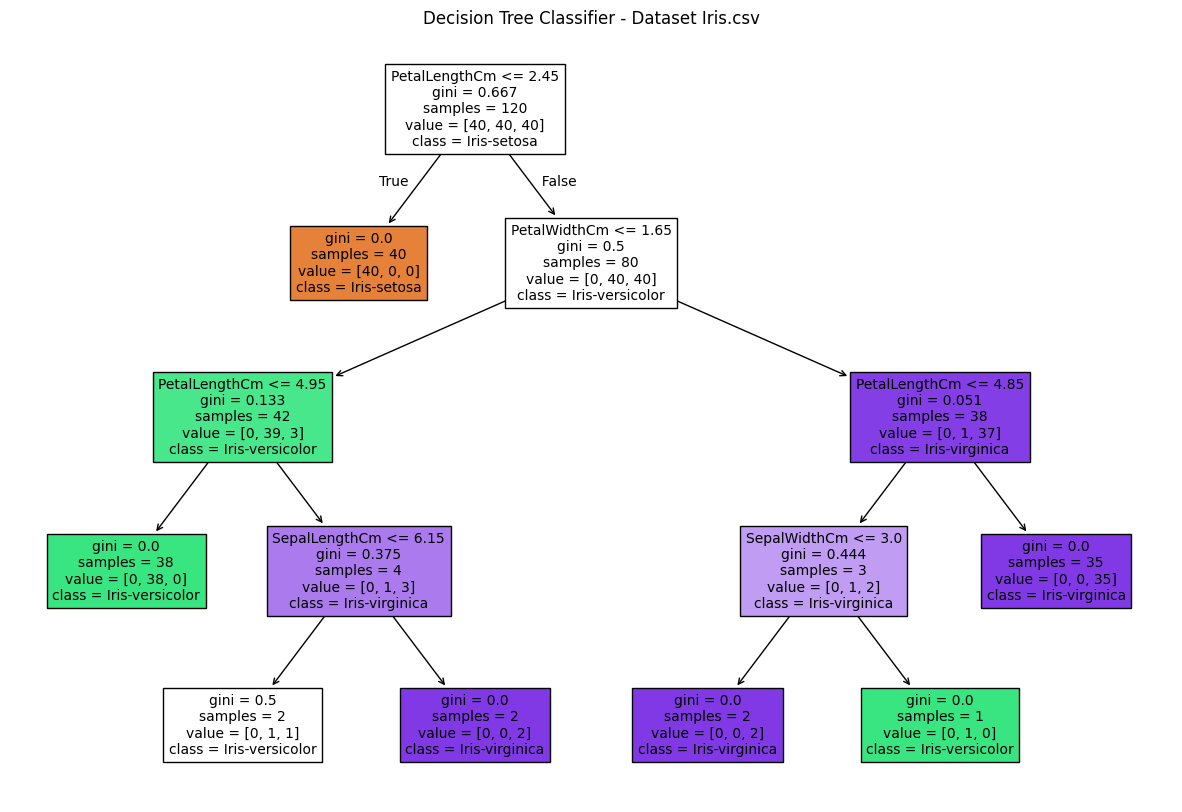

In [24]:
plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          fontsize=10)
plt.title("Decision Tree Classifier - Dataset Iris.csv")
plt.show()

In [25]:
sample = X_test.iloc[:5]
prediction = model.predict(sample)

for i, p in enumerate(prediction):
    print(f"Data ke-{i+1}: Prediksi = {p}")

Data ke-1: Prediksi = Iris-setosa
Data ke-2: Prediksi = Iris-virginica
Data ke-3: Prediksi = Iris-versicolor
Data ke-4: Prediksi = Iris-versicolor
Data ke-5: Prediksi = Iris-setosa
